In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "8"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

from sklearn import *
from sklearn.ensemble import *
from sklearn.model_selection import *
from sklearn.preprocessing import *
from pandas import *
from sklearn.linear_model import *
from scipy.stats import *
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.tree import *
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import chi2_contingency
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, make_scorer, f1_score, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [3]:
pd.set_option('display.max_columns', None)  # setting the pandas dataframe to display all columns
pd.set_option('max_colwidth',None)  # pandas setting to display all the content in each of the columns

### EDA

In [4]:
df = pd.read_csv("asthma_disease_data.csv")

In [5]:
df.shape #29 attributes per each patient

(2392, 29)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               2392 non-null   int64  
 1   Age                     2392 non-null   int64  
 2   Gender                  2392 non-null   int64  
 3   Ethnicity               2392 non-null   int64  
 4   EducationLevel          2392 non-null   int64  
 5   BMI                     2392 non-null   float64
 6   Smoking                 2392 non-null   int64  
 7   PhysicalActivity        2392 non-null   float64
 8   DietQuality             2392 non-null   float64
 9   SleepQuality            2392 non-null   float64
 10  PollutionExposure       2392 non-null   float64
 11  PollenExposure          2392 non-null   float64
 12  DustExposure            2392 non-null   float64
 13  PetAllergy              2392 non-null   int64  
 14  FamilyHistoryAsthma     2392 non-null   

In [7]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,DustExposure,PetAllergy,FamilyHistoryAsthma,HistoryOfAllergies,Eczema,HayFever,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,6229.500000,42.137960,0.493311,0.669732,1.307274,27.244877,0.141722,5.051786,5.022867,7.019012,5.013030,5.114221,4.981864,0.165970,0.301003,0.399247,0.191890,0.253344,0.158027,2.548564,3.741270,0.596154,0.500418,0.503344,0.503344,0.602425,0.604933,0.051839
std,690.655244,21.606655,0.500060,0.986120,0.898242,7.201628,0.348838,2.903574,2.909980,1.732475,2.935605,2.893088,2.859192,0.372131,0.458790,0.489846,0.393869,0.435017,0.364842,0.861809,1.303689,0.490770,0.500104,0.500093,0.500093,0.489499,0.488967,0.221749
min,5034.000000,5.000000,0.000000,0.000000,0.000000,15.031803,0.000000,0.001740,0.003031,4.001437,0.001022,0.000659,0.002434,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000459,1.500045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5631.750000,23.000000,0.000000,0.000000,1.000000,20.968313,0.000000,2.578333,2.432043,5.498500,2.432559,2.599996,2.467489,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.824113,2.607489,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6229.500000,42.000000,0.000000,0.000000,1.000000,27.052202,0.000000,5.016881,5.115383,6.975839,5.036519,5.098452,4.903278,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.553244,3.734982,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,6827.250000,61.000000,1.000000,1.000000,2.000000,33.555903,0.000000,7.540234,7.544216,8.526950,7.630037,7.708836,7.432218,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.292897,4.864121,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,7425.000000,79.000000,1.000000,3.000000,3.000000,39.985611,1.000000,9.995809,9.999904,9.996235,9.998964,9.999555,9.999708,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.999719,5.999421,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.nunique().sort_values()

DoctorInCharge               1
ExerciseInduced              2
NighttimeSymptoms            2
Coughing                     2
ChestTightness               2
ShortnessOfBreath            2
Wheezing                     2
GastroesophagealReflux       2
HayFever                     2
Eczema                       2
HistoryOfAllergies           2
Diagnosis                    2
PetAllergy                   2
FamilyHistoryAsthma          2
Smoking                      2
Gender                       2
EducationLevel               4
Ethnicity                    4
Age                         75
PollenExposure            2392
PollutionExposure         2392
SleepQuality              2392
DietQuality               2392
PhysicalActivity          2392
LungFunctionFEV1          2392
LungFunctionFVC           2392
BMI                       2392
DustExposure              2392
PatientID                 2392
dtype: int64

In [9]:
missing_data = df.isnull().sum()
total_data = df.shape[0]

missing_info = pd.DataFrame({'Missing Data': missing_data, 'Total Data': total_data})
missing_info = missing_info[missing_info['Missing Data'] > 0]

print(missing_info)

Empty DataFrame
Columns: [Missing Data, Total Data]
Index: []


In [10]:
# drop columns that have no value in the model
df.drop(['PatientID', 'DoctorInCharge'], axis = 1, inplace = True)

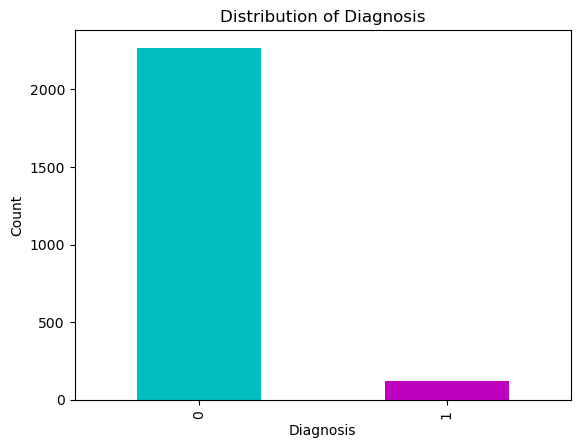

Diagnosis
0    2268
1     124
Name: count, dtype: int64


In [11]:
# Count occurrences of each class
count_diagnosis = df['Diagnosis'].value_counts()
count_diagnosis.plot(kind = 'bar', color = ['c','m'])
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Distribution of Diagnosis')
plt.show()

print(count_diagnosis)

Target Variable is imbalanced. It can lead to below issues :
1. Bias Toward the majority class.
   
The model may become biased toward predicting the majority class, i.e. 0 , as it can achieve a high overall accuracy (95%) by simply predicting the most frequent class. For example,a model can predict negative cases for every sample and it will achieve 95% accuracy but won't correctly identify positive cases.

3. Misleading ROC-AUC Curve.
   
In imbalanced datasets, the ROC curve may still show a good AUC score even if the model is poor at predicting the minority class.Precision-recall curves are often more informative in highly imbalanced datasets, as they focus on the minority class.

### FEV1/ FVC ratio 

The FEV1/FVC ratio is the ratio of the forced expiratory volume in the first one second to the forced vital capacity of the lungs. The normal value for this ratio is above 0.75-85, though this is age dependent

FEV1/FVC Ratio Severity of Condition: Under 70% Mild, 60 to 69% Moderate, 50 to 9% Moderately severe, 35 to 49% Severe, Under 34% Very severe.

Extreme values should not exceed 120%. Therefore, they **should be excluded** as a data error.

In [12]:
# Creating a new variable for FEV1/FVC ratio
df['FEV1_FVC_ratio'] = df['LungFunctionFEV1'] / df['LungFunctionFVC']

In [13]:
df['FEV1_FVC_ratio'].describe()

count    2392.000000
mean        0.788666
std         0.440339
min         0.171552
25%         0.470483
50%         0.676843
75%         0.981560
max         2.577281
Name: FEV1_FVC_ratio, dtype: float64

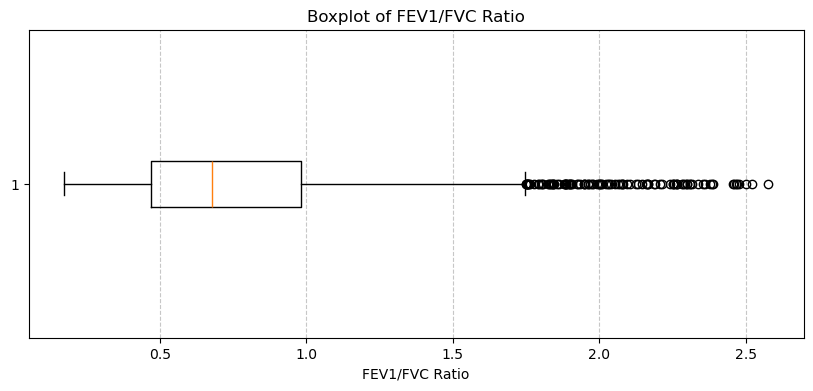

In [14]:
# Filtering only diagnosed individuals (Diagnosis == 1)
diagnosed_data = df[df['Diagnosis'] == 1]

# Plotting boxplot for FEV1/FVC ratio to identify outliers
plt.figure(figsize = (10,4))
plt.boxplot(df['FEV1_FVC_ratio'], vert = False)
plt.xlabel('FEV1/FVC Ratio')
plt.title('Boxplot of FEV1/FVC Ratio')
plt.grid(axis = 'x', linestyle = '--', alpha = 0.7)
plt.show()

In [15]:
# Identifying outliers
q1 = df['FEV1_FVC_ratio'].quantile(0.25)
q3 = df['FEV1_FVC_ratio'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['FEV1_FVC_ratio'] < lower_bound) | (df['FEV1_FVC_ratio'] > upper_bound)]

# Print number of outliers
print(f'Total number of outliers: {len(outliers)}')

# Print number of values greater than 1.2
num_greater_than_1_2 = len(df[df['FEV1_FVC_ratio'] > 1.2])
percentage_greater_than_1_2_all = (num_greater_than_1_2 / len(df)) * 100
print(f'Total number of values greater than 1.2: {num_greater_than_1_2} ({percentage_greater_than_1_2_all:.2f}%)')

# Print percentage of diagnosed individuals with FEV1/FVC ratio greater than 1.2
num_greater_than_1_2_diagnosed = len(diagnosed_data[diagnosed_data['FEV1_FVC_ratio'] > 1.2])
percentage_greater_than_1_2 = (num_greater_than_1_2_diagnosed / len(diagnosed_data)) * 100
print(f'Percentage of diagnosed individuals with FEV1/FVC ratio greater than 1.2: {percentage_greater_than_1_2:.2f}%')

Total number of outliers: 106
Total number of values greater than 1.2: 375 (15.68%)
Percentage of diagnosed individuals with FEV1/FVC ratio greater than 1.2: 13.71%


Even though number of outliers are less than total number of values greater than 1.2 , we decide to remove all error data.

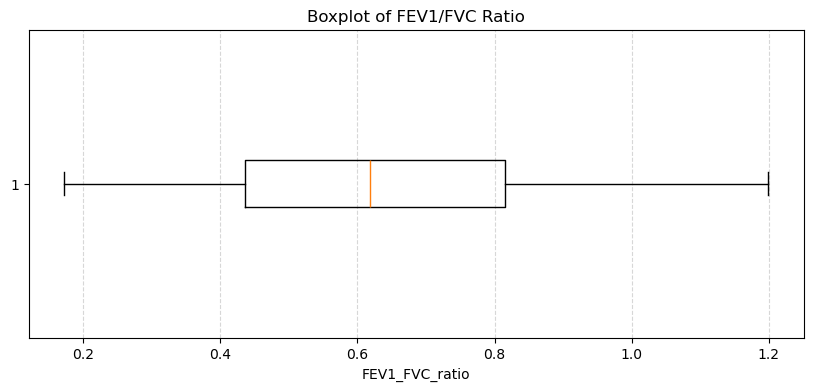

Total number of removed  values: 375


In [16]:
#Creating a copy of the working DataFrame
data = df.copy()

#Removing values where 'FEV1_FVC_ratio' is greater than 1.2
data_wo_outlier = data[data['FEV1_FVC_ratio'] <= 1.2]

#Plotting boxplot for FEV1/FVC ratio to identify outliers
plt.figure(figsize = (10,4))
plt.boxplot(data_wo_outlier['FEV1_FVC_ratio'], vert = False)
plt.xlabel('FEV1_FVC_ratio')
plt.title('Boxplot of FEV1/FVC Ratio')
plt.grid(axis = 'x', linestyle = '--',alpha = 0.5)
plt.show()

# Print number of removed values
removed_num = len(df) - len(data_wo_outlier)
print(f'Total number of removed  values: {removed_num}')

## Visualization

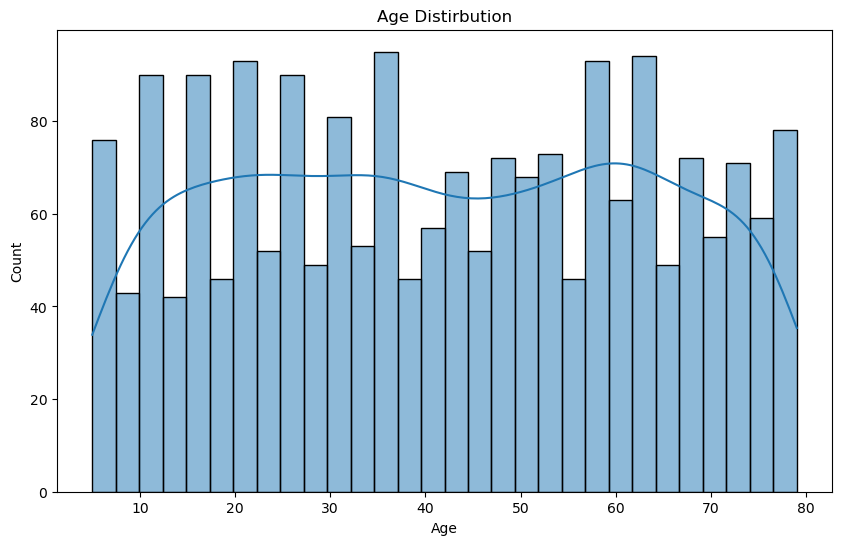

In [17]:
#Age distribution
plt.figure(figsize = (10,6))
sns.histplot(data_wo_outlier['Age'],kde = True,bins = 30)
plt.title('Age Distirbution')
plt.show()

Text(0.5, 1.0, 'Count of Gender')

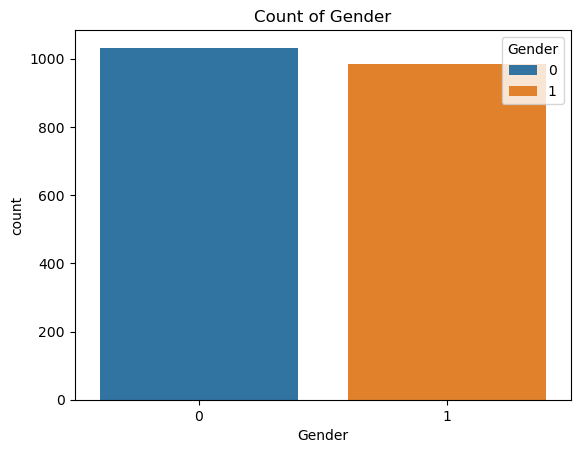

In [18]:
# Gender Visualization
sns.countplot(x = 'Gender', data = data_wo_outlier, hue = 'Gender')
plt.title('Count of Gender')

Text(0.5, 1.0, 'Distribution of BMI')

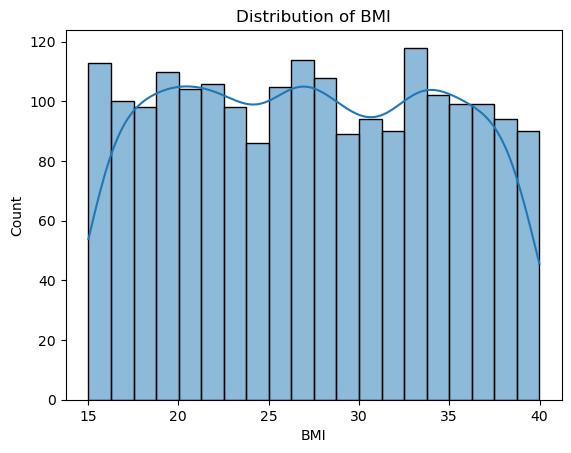

In [19]:
sns.histplot(data_wo_outlier['BMI'], bins = 20, kde = True)
plt.title('Distribution of BMI')

Text(0.5, 1.0, 'Ethnicity Distribution')

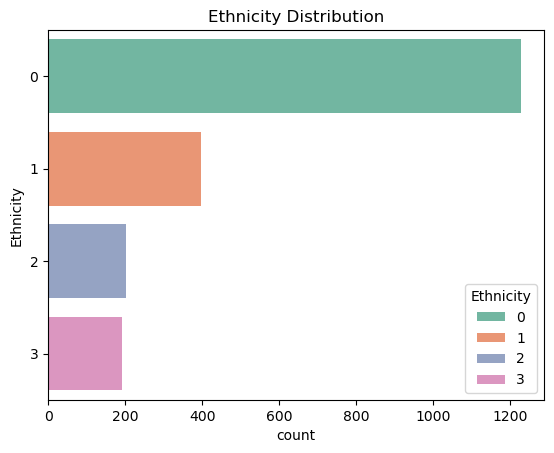

In [20]:
sns.countplot(y = 'Ethnicity', data = data_wo_outlier, hue = 'Ethnicity',palette = 'Set2' , order = data_wo_outlier['Ethnicity'].value_counts().index)
plt.title('Ethnicity Distribution')

Text(0.5, 1.0, 'Family History of Asthma')

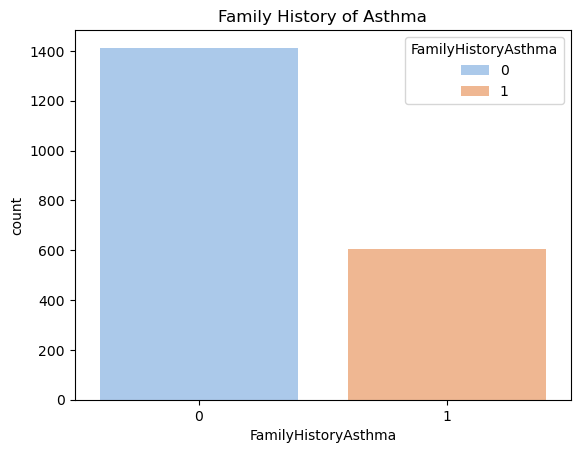

In [21]:
sns.countplot(x = 'FamilyHistoryAsthma', data = data_wo_outlier, hue = 'FamilyHistoryAsthma', palette = 'pastel')
plt.title('Family History of Asthma')

## ML models

In [22]:
data_wo_outlier.columns

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'PhysicalActivity', 'DietQuality', 'SleepQuality', 'PollutionExposure',
       'PollenExposure', 'DustExposure', 'PetAllergy', 'FamilyHistoryAsthma',
       'HistoryOfAllergies', 'Eczema', 'HayFever', 'GastroesophagealReflux',
       'LungFunctionFEV1', 'LungFunctionFVC', 'Wheezing', 'ShortnessOfBreath',
       'ChestTightness', 'Coughing', 'NighttimeSymptoms', 'ExerciseInduced',
       'Diagnosis', 'FEV1_FVC_ratio'],
      dtype='object')

In [23]:
# Specify features to be used
selected_features = [
'Age', 'BMI', 'DietQuality', 'DustExposure', 'LungFunctionFEV1', 'LungFunctionFVC', 'PollenExposure',   'SleepQuality', 
'ChestTightness', 'Coughing', 'Eczema', 'EducationLevel', 'Ethnicity', 'ExerciseInduced', 
'FamilyHistoryAsthma', 'GastroesophagealReflux', 'Gender', 'HayFever', 'HistoryOfAllergies', 
'NighttimeSymptoms', 'PetAllergy', 'PhysicalActivity', 'PollutionExposure', 
'ShortnessOfBreath', 'Smoking', 'Wheezing','FEV1_FVC_ratio'
]

#Splitting data into train and test sets with imbalanced 'Diagnosis' consideration
X = data_wo_outlier[selected_features]
y = data_wo_outlier['Diagnosis']

# Split data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42, stratify = y )

# Apply SMOTE to tackle imbalance dataset
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train,y_train)

#Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

#List of models to train
models = [    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=5)),
    ('Random Forest', RandomForestClassifier(random_state=42, class_weight='balanced')),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Support Vector Machine', SVC(random_state = 42, class_weight = 'balanced'))]

# Train each model and evaluate
for model_name, model in models:
    print(f"\nTraining {model_name}...")
    model.fit(X_train_scaled, y_train_resampled)

    #Predict classes  for the test set
    y_pred = model.predict(X_test_scaled)

    #Print classification report for the model
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test,y_pred, zero_division = 0))

    # Print confusion matrix for the model
    print(f"Confusion Matrix for {model_name}:")
    print(confusion_matrix(y_test, y_pred))
    




Training K-Nearest Neighbors...
Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.96      0.69      0.80       383
           1       0.07      0.43      0.12        21

    accuracy                           0.68       404
   macro avg       0.51      0.56      0.46       404
weighted avg       0.91      0.68      0.77       404

Confusion Matrix for K-Nearest Neighbors:
[[265 118]
 [ 12   9]]

Training Random Forest...
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       383
           1       0.00      0.00      0.00        21

    accuracy                           0.93       404
   macro avg       0.47      0.49      0.48       404
weighted avg       0.90      0.93      0.91       404

Confusion Matrix for Random Forest:
[[376   7]
 [ 21   0]]

Training Logistic Regression...
Classification Report for Logistic Regres

**As seen above , all of the models fail to identify people with asthma , which is more important than identifying healthy people**

### Let's use cross_validation and see if it changes

In [24]:
# Specify features to be used
selected_features = [
    'Age', 'BMI', 'DietQuality', 'DustExposure', 'LungFunctionFEV1', 'LungFunctionFVC', 'PollenExposure', 
    'SleepQuality', 'ChestTightness', 'Coughing', 'Eczema', 'EducationLevel', 'Ethnicity', 'ExerciseInduced', 
    'FamilyHistoryAsthma', 'GastroesophagealReflux', 'Gender', 'HayFever', 'HistoryOfAllergies', 
    'NighttimeSymptoms', 'PetAllergy', 'PhysicalActivity', 'PollutionExposure', 
    'ShortnessOfBreath', 'Smoking', 'Wheezing', 'FEV1_FVC_ratio'
]

# Splitting data into train and test sets with imbalanced 'Diagnosis' consideration
X = data_wo_outlier[selected_features]
y = data_wo_outlier['Diagnosis']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to tackle imbalance dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# List of models to train
models = [
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=5)),
    ('Random Forest', RandomForestClassifier(random_state=42, class_weight='balanced')),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42, class_weight='balanced'))  # Added SVM
]

# Use StratifiedKFold for cross-validation to maintain the proportion of classes
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Train each model and evaluate with cross-validation
for model_name, model in models:
    print(f"\nTraining {model_name}...")
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train_resampled, cv=cv, scoring='accuracy')
    
    print(f"Cross-Validation Accuracy for {model_name}: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    
    # Train the model on the full resampled training set
    model.fit(X_train_scaled, y_train_resampled)
    
    # Predict classes for the test set
    y_pred = model.predict(X_test_scaled)

    # Print classification report for the model
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred, zero_division=0))

    # Print confusion matrix for the model
    print(f"Confusion Matrix for {model_name}:")
    print(confusion_matrix(y_test, y_pred))

    print("Cross-validation F1 Scores for each fold:")
    for i, score in enumerate(cv_scores):
        print(f"Fold {i + 1}: F1 Score = {score:.4f}")


Training K-Nearest Neighbors...
Cross-Validation Accuracy for K-Nearest Neighbors: 0.8386 ± 0.0166
Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.96      0.69      0.80       383
           1       0.07      0.43      0.12        21

    accuracy                           0.68       404
   macro avg       0.51      0.56      0.46       404
weighted avg       0.91      0.68      0.77       404

Confusion Matrix for K-Nearest Neighbors:
[[265 118]
 [ 12   9]]
Cross-validation F1 Scores for each fold:
Fold 1: F1 Score = 0.8464
Fold 2: F1 Score = 0.8268
Fold 3: F1 Score = 0.8529
Fold 4: F1 Score = 0.8105
Fold 5: F1 Score = 0.8492
Fold 6: F1 Score = 0.8590
Fold 7: F1 Score = 0.8262
Fold 8: F1 Score = 0.8230
Fold 9: F1 Score = 0.8623
Fold 10: F1 Score = 0.8295

Training Random Forest...
Cross-Validation Accuracy for Random Forest: 0.9623 ± 0.0055
Classification Report for Random Forest:
              precision    re

### Feature Engineering (Create new clusters for FEV1 FVC ratio)

In this approach elbow method is used to choose the most optimal number of clusters

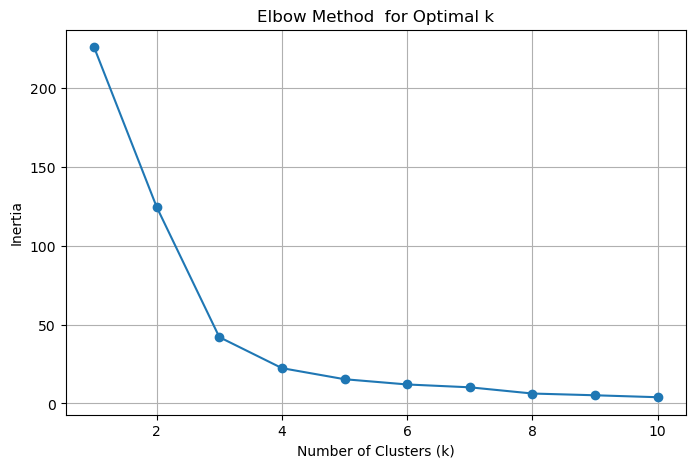

In [25]:
X = data_wo_outlier[['FEV1_FVC_ratio', 'Diagnosis']]

#Determine the optimal number of clusters using the Elbow method
inertia = []
k_range = range(1,11)

for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state = 42, n_init = 'auto')
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize =(8,5))
plt.plot(k_range,inertia,marker = 'o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method  for Optimal k')
plt.grid(True)
plt.show()

Now that we have determined  the optimal number of clusters using the **elbow method**, the next steps involve actually applying this information to the data.

In [32]:
# Fit KMeans with the optimal number of clusters (4)
X = data_wo_outlier[['FEV1_FVC_ratio', 'Diagnosis']]
kmeans = KMeans(n_clusters=4,random_state = 42,  n_init='auto')
kmeans.fit(X)

# Adding cluster labels to the data
data_wo_outlier.loc[:,'Cluster'] = kmeans.labels_

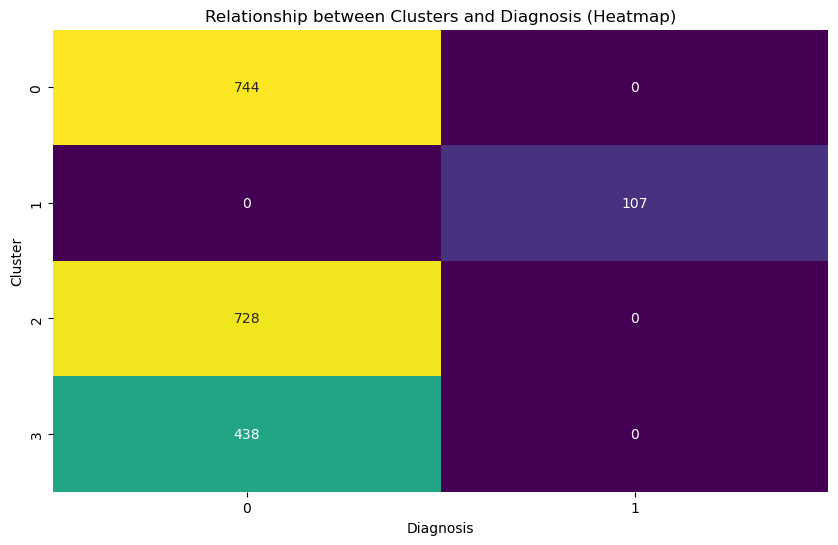

In [30]:
# Cross-tabulate the number of occurrences of each Diagnosis category within each Cluster
ct = pd.crosstab(data_wo_outlier['Cluster'], data_wo_outlier['Diagnosis'])

# Create a heatmap of the cross-tabulation
plt.figure(figsize=(10,6))
sns.heatmap(ct, annot=True, fmt='d', cmap='viridis', cbar=False)
plt.title('Relationship between Clusters and Diagnosis (Heatmap)')
plt.xlabel('Diagnosis')
plt.ylabel('Cluster')
plt.show()

In [33]:
#Creating  one-hot enconding  for clusters
one_hot_encoded = pd.get_dummies(data_wo_outlier['Cluster'],prefix = 'FEV1_FVC').astype(int)
data = pd.concat([data_wo_outlier,one_hot_encoded], axis = 1)
data = data.drop(columns=['Cluster', 'FEV1_FVC_ratio'], errors='ignore')

In [34]:
data

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,DustExposure,PetAllergy,FamilyHistoryAsthma,HistoryOfAllergies,Eczema,HayFever,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,FEV1_FVC_0,FEV1_FVC_1,FEV1_FVC_2,FEV1_FVC_3
0,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,2.855578,0.974339,1,1,0,0,0,0,1.369051,4.941206,0,0,1,0,0,1,0,0,0,1,0
2,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,1.460593,1.448189,5.445799,0,1,1,0,1,0,1.698011,5.022553,1,1,1,0,1,1,0,0,0,1,0
4,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,0.980875,3.049807,8.260605,0,0,0,0,1,0,3.470589,3.067944,1,1,1,0,0,1,0,0,0,0,1
5,21,0,2,0,21.812975,0,0.470044,1.759118,9.549262,1.711446,7.192424,6.832048,1,0,0,1,0,0,2.328191,5.898515,1,0,1,0,0,1,0,0,0,1,0
7,26,0,0,1,26.048416,1,8.344096,1.626484,6.431179,6.939046,8.417881,2.190541,0,0,0,1,0,0,2.069343,4.012260,1,0,0,1,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2385,19,1,1,2,37.913891,0,5.595540,3.120986,4.122047,1.721562,6.987788,0.341095,0,1,1,0,0,0,3.849256,4.910336,0,1,1,1,0,1,0,1,0,0,0
2387,43,1,0,2,29.059613,0,3.019854,6.119637,8.300960,2.483829,7.314582,3.425445,1,0,1,0,0,0,3.125249,5.166032,0,1,0,0,0,1,1,0,1,0,0
2388,18,1,0,1,20.740850,0,5.805180,4.386992,7.731192,7.733983,2.279073,6.467701,0,0,0,1,0,0,1.132977,5.509502,0,0,0,1,1,0,1,0,1,0,0
2389,54,0,3,2,37.079560,0,4.735169,8.214064,7.483521,2.794847,3.055139,9.484013,0,0,0,0,1,0,1.685962,3.346877,1,0,1,1,0,1,1,0,1,0,0


In [35]:
# Second approach - putting all new and old variables together

# Splitting data into train and test sets with imbalanced 'Diagnosis' consideration
X = data.drop(columns = ['Diagnosis'])
y = data['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42, stratify = y)


# Apply SMOTE to tackle imbalance dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# List of models to train
models = [
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=5)),
    ('Random Forest', RandomForestClassifier(random_state=42, class_weight='balanced')),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42, class_weight='balanced'))  # Added SVM
]

# Use StratifiedKFold for cross-validation to maintain the proportion of classes
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Train each model and evaluate with cross-validation
for model_name, model in models:
    print(f"\nTraining {model_name}...")
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train_resampled, cv=cv, scoring='accuracy')
    
    print(f"Cross-Validation Accuracy for {model_name}: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    
    # Train the model on the full resampled training set
    model.fit(X_train_scaled, y_train_resampled)
    
    # Predict classes for the test set
    y_pred = model.predict(X_test_scaled)

    # Print classification report for the model
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred, zero_division=0))

    # Print confusion matrix for the model
    print(f"Confusion Matrix for {model_name}:")
    print(confusion_matrix(y_test, y_pred))

    print("Cross-validation F1 Scores for each fold:")
    for i, score in enumerate(cv_scores):
        print(f"Fold {i + 1}: F1 Score = {score:.4f}")


Training K-Nearest Neighbors...
Cross-Validation Accuracy for K-Nearest Neighbors: 0.9872 ± 0.0032
Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       383
           1       0.70      0.90      0.79        21

    accuracy                           0.98       404
   macro avg       0.85      0.94      0.89       404
weighted avg       0.98      0.98      0.98       404

Confusion Matrix for K-Nearest Neighbors:
[[375   8]
 [  2  19]]
Cross-validation F1 Scores for each fold:
Fold 1: F1 Score = 0.9918
Fold 2: F1 Score = 0.9836
Fold 3: F1 Score = 0.9902
Fold 4: F1 Score = 0.9853
Fold 5: F1 Score = 0.9852

Training Random Forest...
Cross-Validation Accuracy for Random Forest: 1.0000 ± 0.0000
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       383
           1       1.00      1.00      1.00        